## 1. `Importing Libraries📦`

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.

StandardScalerort matplotlib.pyplot as plt
import seaborn as sns

## 2. `Importing Dataset📁`

In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
test_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


## 3. `General Information about Dataset 📝`

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [6]:
train_data.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [7]:
train_data.shape

(300000, 11)

In [8]:
train_data.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [9]:
train_data.nunique()

id                      300000
Brand                        5
Material                     4
Size                         3
Compartments                10
Laptop Compartment           2
Waterproof                   2
Style                        3
Color                        6
Weight Capacity (kg)    181596
Price                    48212
dtype: int64

## 4. `Data Preprocessing`

### 4.1 Handling Missing Values

In [10]:
missing_train_data = train_data.isnull().sum()
missing_test_data = test_data.isnull().sum()
print(missing_test_data, end = '\n\n')
print(missing_train_data)

id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64


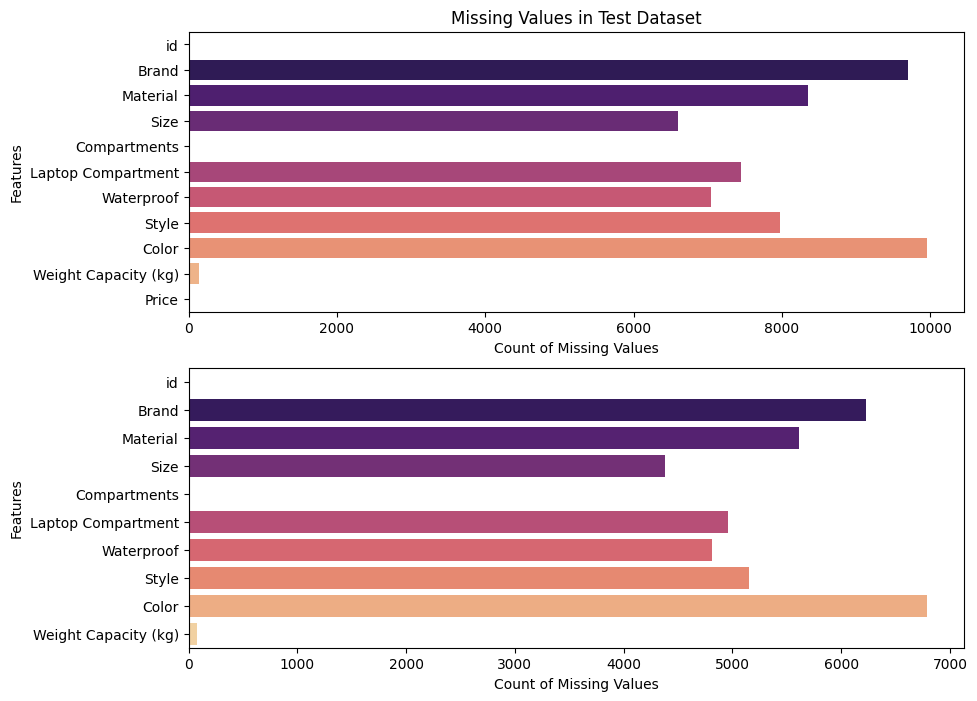

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 8))
sns.barplot(data=missing_train_data, palette="magma", orient='h', ax = ax[0])
sns.barplot(data=missing_test_data, palette="magma", orient='h', ax = ax[1])
ax[0].set_xlabel("Count of Missing Values")
ax[1].set_xlabel("Count of Missing Values")
ax[0].set_ylabel("Features")
ax[1].set_ylabel("Features")
ax[0].set_title("Missing Values in Train Dataset")
ax[0].set_title("Missing Values in Test Dataset")
plt.show()

In [12]:
train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 300000 non-null  object 
 2   Material              300000 non-null  object 
 3   Size                  300000 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    300000 non-null  object 
 6   Waterproof            300000 non-null  object 
 7   Style                 300000 non-null  object 
 8   Color                 300000 non-null  object 
 9   Weight Capacity (kg)  300000 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Brand                 200000 non-null  object 
 2   Material              200000 non-null  object 
 3   Size                  200000 non-null  object 
 4   Compartments          200000 non-null  float64
 5   Laptop Compartment    200000 non-null  object 
 6   Waterproof            200000 non-null  object 
 7   Style                 200000 non-null  object 
 8   Color                 200000 non-null  object 
 9   Weight Capacity (kg)  200000 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.3+ MB


### 4.2 Handling Duplicates

In [17]:
train_data.duplicated().sum()

np.int64(0)

In [18]:
test_data.duplicated().sum()

np.int64(0)

### 4.3 Handling Outliers

In [21]:
def outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col_name] >= Q1 - 1.5 * IQR) & (df[col_name] <= Q3 + 1.5 * IQR)]
   
numeric_cols = list(train_data.select_dtypes(['float', 'int']).iloc[:, 1:-1].columns)
for index, col in enumerate(numeric_cols):
    print(f'filled_train_data[{col}] -> {outliers(train_data, col)}')
    print(f'filled_test_data[{col}] -> {outliers(test_data, col)}')
    print()

filled_train_data[Compartments] -> None
filled_test_data[Compartments] -> None

filled_train_data[Weight Capacity (kg)] -> None
filled_test_data[Weight Capacity (kg)] -> None



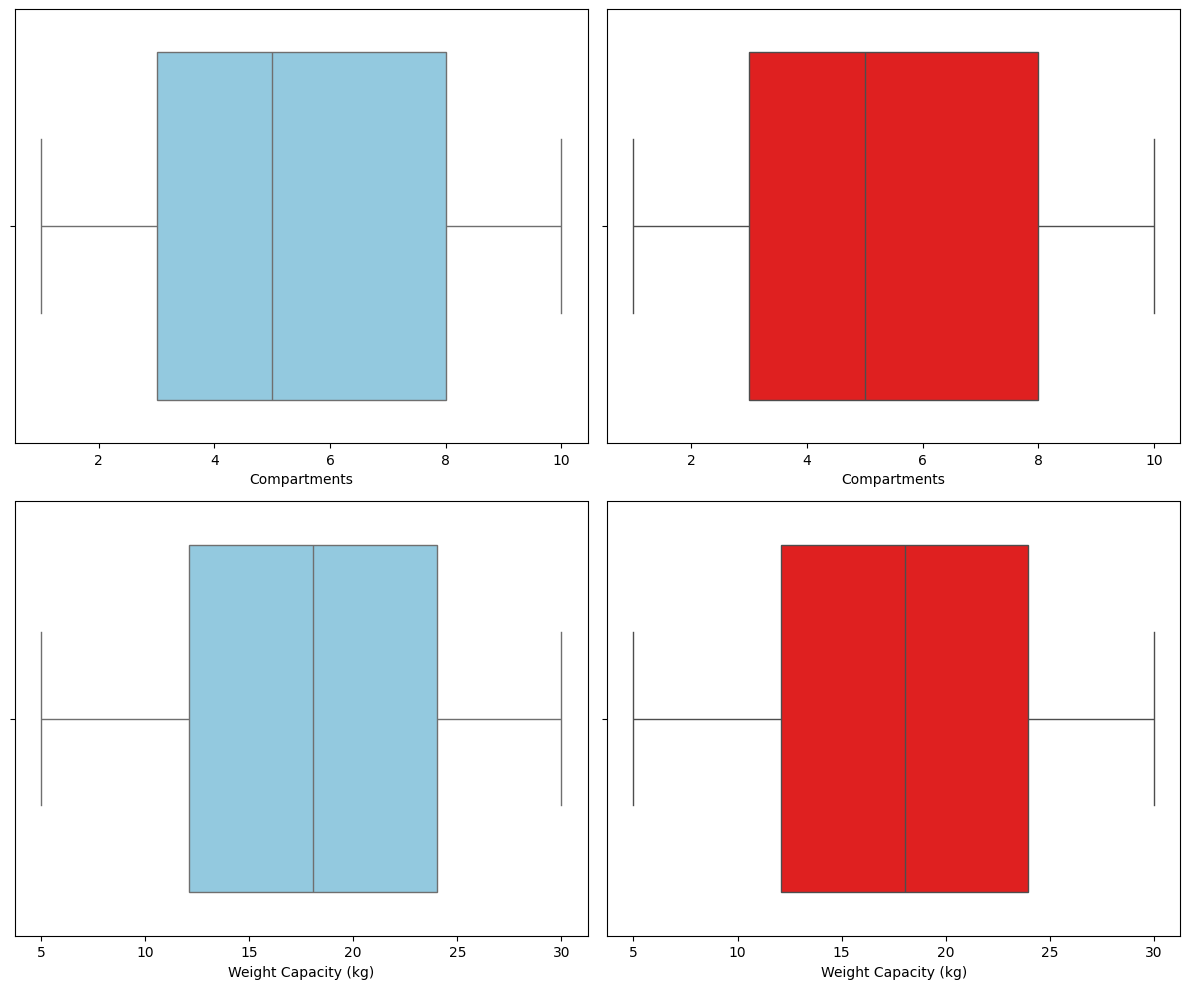

In [24]:
numeric_cols = list(train_data.select_dtypes(['float', 'int']).iloc[:, 1:-1].columns)
fig, ax = plt.subplots(nrows = len(numeric_cols), ncols = 2, figsize=(12,10))
for index, col in enumerate(numeric_cols):
    sns.boxplot(train_data[col], ax=ax[index,0], orient='h', color='skyblue')
    sns.boxplot(test_data[col], ax=ax[index,1], orient='h', color='red')
plt.tight_layout()
plt.show()

- No Outliers found 

## 5. `Dataset Analysis`

### 5.1 Univariate Analysis

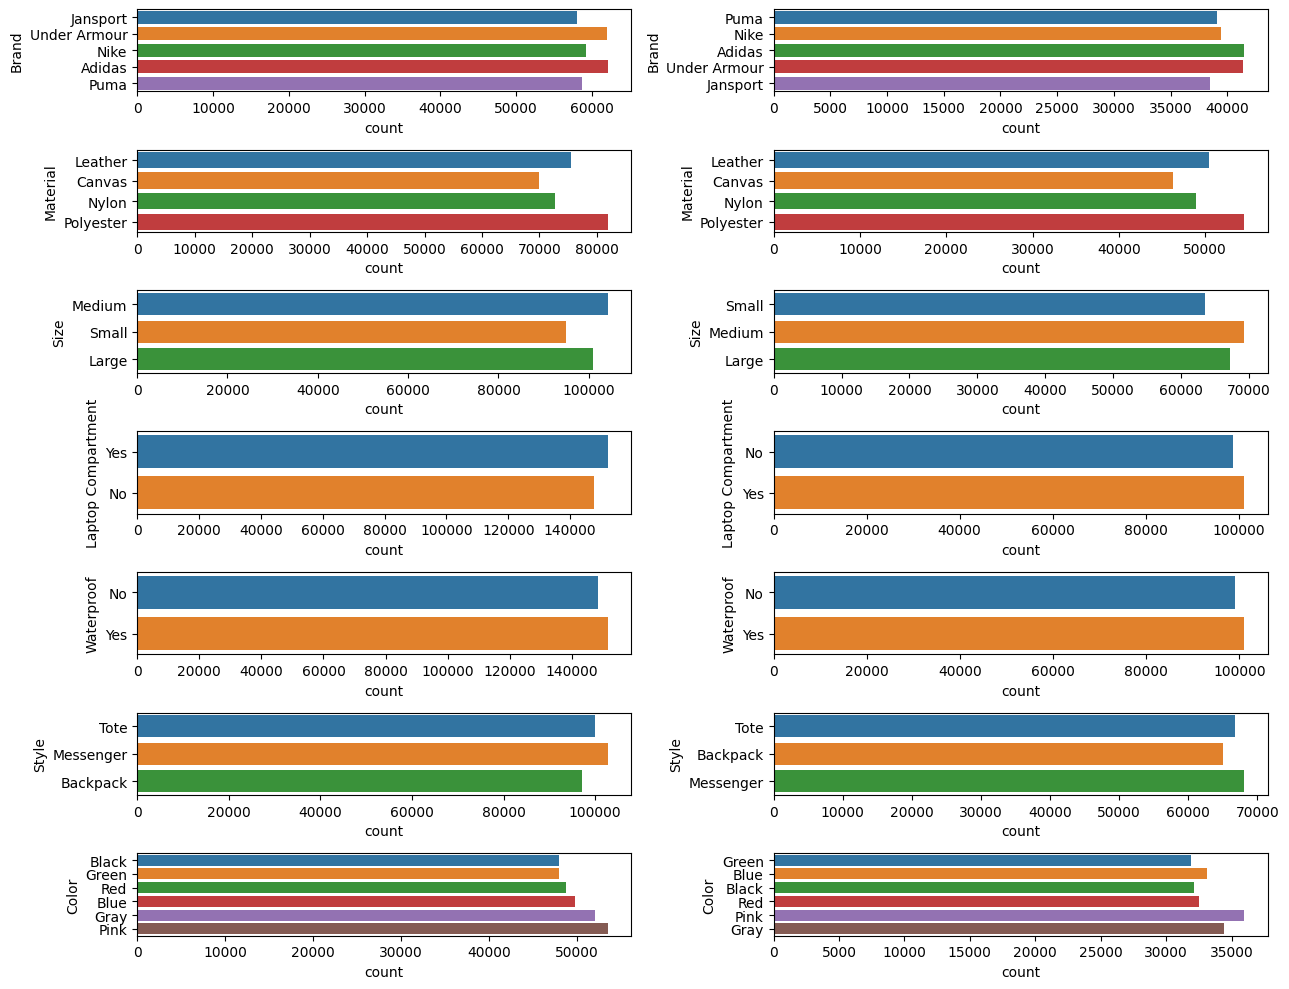

In [27]:
object_cols = list(train_data.select_dtypes('object').columns)
fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize=(13,10))
for index, col in enumerate(object_cols):
    sns.countplot(train_data[col], ax = ax[index, 0], palette = 'tab10')
    sns.countplot(test_data[col], ax = ax[index, 1], palette = 'tab10')

plt.tight_layout()
plt.show()

### Optional: Adding Extra Train Data

In [30]:
filled_train_data = pd.concat([train_data, pd.read_csv('../data/training_extra.csv')])

In [31]:
filled_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3694317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 365.7+ MB


In [34]:
filled_train_data.isnull().sum()

id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64

In [35]:
filled_train_data = filled_train_data.fillna(method = 'ffill')

## 6. `Data Encoding`

In [39]:
le = LabelEncoder()

object_cols = list(train_data.select_dtypes('object').columns)
for col in object_cols:
    filled_train_data[col] = le.fit_transform(filled_train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

## 7. `Normalizing Numerical Features`

## 6. `Saving Processed Dataset`

In [41]:
filled_train_data.to_csv('../data/train_data.csv', index = False)
test_data.to_csv('../data/test_data.csv', index = False)